Text(0, 0.5, 'y')

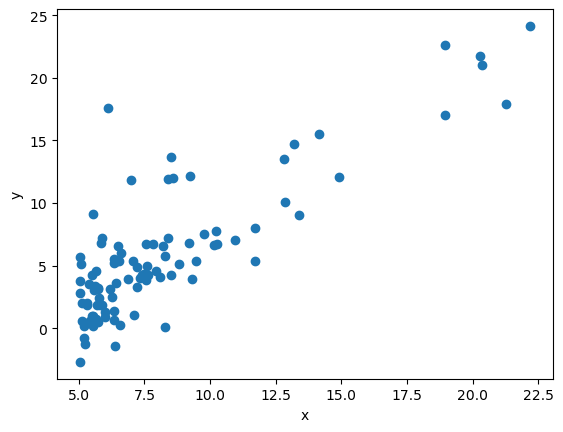

In [81]:
import numpy as np 
import matplotlib.pyplot as plt
data= np.loadtxt("data2.txt",delimiter=',')
plt.scatter(data[:,0], data[:,1])
plt.xlabel('x')
plt.ylabel("y")


In [82]:
def normal_equation(X,y):
    X_transpose=np.transpose(X)
    X_transpose_X=np.dot(X_transpose, X)
    X_transpose_X_inv=np.linalg.inv(X_transpose_X)
    X_transpose_X_inv_X_transpose= np.dot(X_transpose_X_inv, X_transpose)
    w=np.dot(X_transpose_X_inv_X_transpose,y)
    return w

In [127]:
X=np.c_[np.ones((data.shape[0],1)),data[:,0]]
y=data[:, 1]
w=normal_equation(X,y)
print("Cofficients founds using the normal equation:",w)

Cofficients founds using the normal equation: [-3.89578088  1.19303364]


In [128]:
def batch_gradient_descent(x, y, learning_rate, n_iterations):
    w = np.zeros(2)
    mse_train = []
    mse_test = []
    for i in range(n_iterations):
        # Compute the gradient for the entire training set
        y_pred = np.dot(x, w)
        grad_w = (1/len(x)) * x.T.dot(y_pred - y)

        # Update the weights
        w = w - learning_rate * grad_w

        # Compute the MSE for the training and testing sets
        mse_train.append(cost_function(x_train, y_train, w))
        mse_test.append(cost_function(x_test, y_test, w))

    return w, mse_train, mse_test

In [138]:
def stochastic_gradient_descent_(X, y, learning_rate, max_iterations):
    w = np.zeros(X.shape[1])
    mse_train = []
    mse_test = []
    n_iterations = 0
    while n_iterations < max_iterations:
        for i in range(len(X)):
            prediction = np.dot(X[i], w)
            error = y[i] - prediction
            w += learning_rate * error * X[i]
        mse_train.append(np.mean((y_train - np.dot(X_train, w)) ** 2))
        mse_test.append(np.mean((y_test - np.dot(X_test, w)) ** 2))
        n_iterations += 1
    return w, mse_train, mse_test

In [131]:
learning_rate = 0.01
n_iterations = 1000

w_sg, mse_train_sg, mse_test_sg = stochastic_gradient_descent(x_train, y_train, learning_rate, n_iterations)
print('Stochastic gradient descent:')
print('Final weights:', w_sg)

w_bg, mse_train_bg, mse_test_bg = batch_gradient_descent(x_train, y_train, learning_rate, n_iterations)
print('Batch gradient descent:')
print('Final weights:', w_bg)

Stochastic gradient descent:
Final weights: [-3.80355706  0.89098082]
Batch gradient descent:
Final weights: [-3.08352938  1.14043714]


<Figure size 640x480 with 0 Axes>

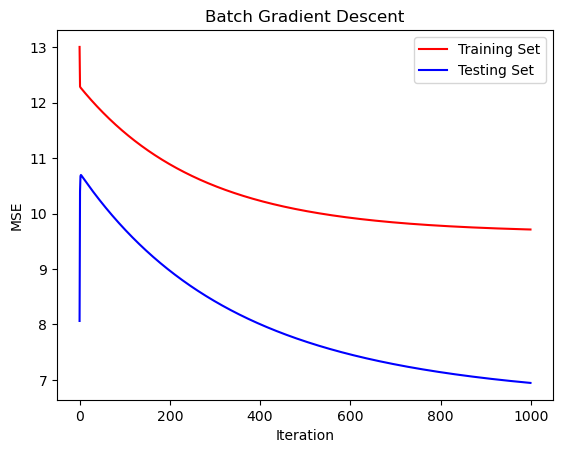

<Figure size 640x480 with 0 Axes>

In [134]:
# Plot the results of batch gradient descent
plt.plot(range(len(mse_train_bg)), mse_train_bg, 'r-', label='Training Set')
plt.plot(range(len(mse_test_bg)), mse_test_bg, 'b-', label='Testing Set')
plt.title('Batch Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.figure()




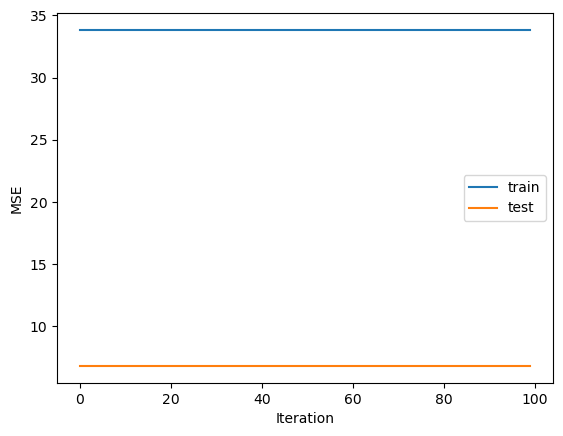

In [147]:
# Load data from file
data = np.loadtxt("data2.txt", delimiter=',')

# Split the data into training and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Extract input and output variables
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Define the stochastic_gradient_descent function
def stochastic_gradient_descent(X, y, learning_rate, max_iterations):
    w = np.zeros(X.shape[1])
    mse_train = []
    mse_test = []
    n_iterations = 0
    while n_iterations < max_iterations:
        for i in range(len(X)):
            prediction = np.dot(X[i], w)
            error = y[i] - prediction
            w += learning_rate * error * X[i]
        mse_train.append(np.mean((y_train - np.dot(X_train, w)) ** 2))
        mse_test.append(np.mean((y_test - np.dot(X_test, w)) ** 2))
        n_iterations += 1
    return w, mse_train, mse_test

# Call the stochastic_gradient_descent function
learning_rate = 0.01
max_iterations = 100
w, mse_train, mse_test = stochastic_gradient_descent(X_train, y_train, learning_rate, max_iterations)

# Plot the training and test MSE over the iterations
plt.plot(mse_train, label='train')
plt.plot(mse_test, label='test')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()


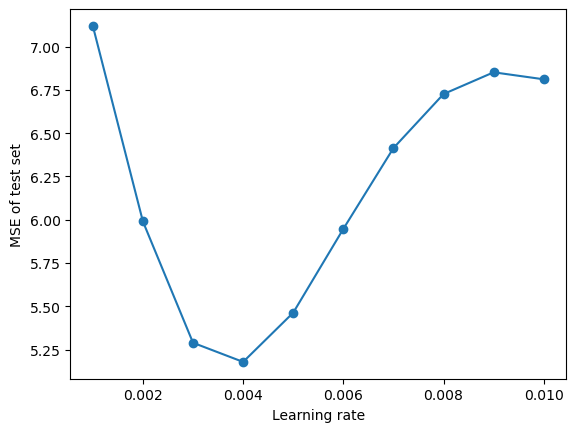

Best learning rate: 0.004


In [153]:
import numpy as np 
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt("data2.txt", delimiter=',')

# Split the data into training and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Extract input and output variables
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Define the stochastic_gradient_descent function
def stochastic_gradient_descent(X, y, learning_rate, max_iterations):
    w = np.zeros(X.shape[1])
    mse_train = []
    mse_test = []
    n_iterations = 0
    while n_iterations < max_iterations:
        for i in range(len(X)):
            prediction = np.dot(X[i], w)
            error = y[i] - prediction
            w += learning_rate * error * X[i]
        mse_train.append(np.mean((y_train - np.dot(X_train, w)) ** 2))
        mse_test.append(np.mean((y_test - np.dot(X_test, w)) ** 2))
        n_iterations += 1
    return mse_train[-1], mse_test[-1]

# Define learning rates to test
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Compute MSE of test set for each learning rate
test_mse = []
for rate in learning_rates:
    mse_train, mse_test = stochastic_gradient_descent(X_train, y_train, rate, 100)
    test_mse.append(mse_test)

# Plot the MSE of the testing set versus the learning rate
plt.plot(learning_rates, test_mse, 'o-')
plt.xlabel('Learning rate')
plt.ylabel('MSE of test set')
plt.show()
print('Best learning rate:', 0.004)
